In [1]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
cell_tidy_data = pd.read_hdf(
    '/home/hanliu/project/mouse_rostral_brain/study/ITSpatial-DissectionRegion/ITSpatial.cell_tidy_data.hdf'
)


In [4]:
dendro = joblib.load(
    f'/home/hanliu/project/mouse_rostral_brain/study/ITSpatial-DissectionRegion/DMG/ITSpatial.pvclust.dendrogram.lib'
)
linkage = pd.read_csv(
    f'/home/hanliu/project/mouse_rostral_brain/study/ITSpatial-DissectionRegion/DMG/ITSpatial.pvclust.linkage.csv',
    header=0,
    index_col=0).reset_index(drop=True)

linkage_labels = pd.read_csv(
    f'/home/hanliu/project/mouse_rostral_brain/study/ITSpatial-DissectionRegion/DMG/ITSpatial.pvclust.linkage.orders.txt',
    header=None,
    index_col=0).index

node_dict = joblib.load(
    '/home/hanliu/project/mouse_rostral_brain/study/ITSpatial-DissectionRegion/DMG/ITSpatial.pvclust.non_singleton_node_dict.lib'
)

cell_class_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
major_type_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
sub_type_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
region_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
sub_region_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
major_region_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
region_to_name = cell_tidy_data.set_index('Region')['RegionName'].to_dict()
region_name_palette = {
    region_to_name[k]: v
    for k, v in region_palette.items() if k in region_to_name
}
int_to_cluster = {i: cluster for i, cluster in zip(dendro['leaves'], dendro['ivl'])}

In [35]:
counts = cell_tidy_data.groupby('MajorType')['RegionName'].value_counts().fillna(0)
counts.name = 'Counts'
counts = counts.reset_index()

layer_order = ['IT-L23', 'IT-L4', 'IT-L5', 'IT-L6']
region_order = [
    'ORB', 'PFC-1', 'PFC-2', 'ACA-1', 'ACA-2', 'ACA-3', 'AI', 'MOs-1', 'MOs-2',
    'MOs-3', 'MOp-1', 'MOp-2', 'MOp-3', 'MOp-4', 'SSp-1', 'SSp-2', 'SSp-3',
    'SSp-4', 'SSp-5', 'SSs-1', 'SSs-2'
][::-1]
counts['x'] = counts['MajorType'].apply(lambda i: layer_order.index(i))
counts['y'] = counts['RegionName'].apply(lambda i: region_order.index(i))

In [37]:
counts['Counts'].describe()

count     73.000000
mean     333.684932
std      106.625888
min      107.000000
25%      256.000000
50%      355.000000
75%      410.000000
max      614.000000
Name: Counts, dtype: float64

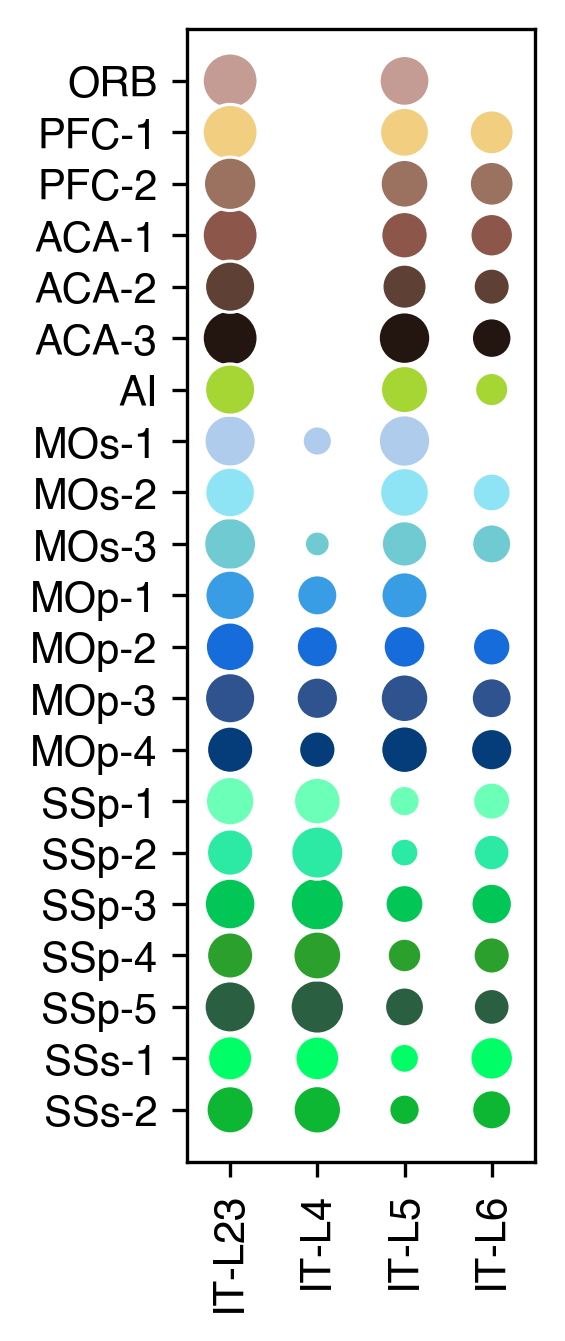

In [43]:
fig, ax = plt.subplots(figsize=(1.5, 5), dpi=300)

sns.scatterplot(data=counts, x='x', y='y', ax=ax,
                hue='RegionName', palette= region_name_palette,
                size='Counts', sizes=(18, 180), size_norm=(50, 500), 
                legend=None)

ax.set(xticks=(0, 1, 2, 3), xticklabels=layer_order)
ax.set(yticks=range(len(region_order)), yticklabels=region_order)
ax.set(xlim=(-0.5, 3.5))
ax.set(xlabel='', ylabel='')
ax.xaxis.set_tick_params(rotation=90)
fig.savefig('Region-Layer_composition.pdf')
pass